In [1]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel('seeds2.xlsx')
sentiment_scores = df['Sentiment'].values 

benchmark_value = 0.0

mean_score = np.mean(sentiment_scores)
std_dev = np.std(sentiment_scores, ddof=1) # Sample standard deviation
n = len(sentiment_scores)

Shapiro-Wilk Test Statistic: 0.5248, P-Value: 0.0000
Data is not normally distributed (Reject H0).


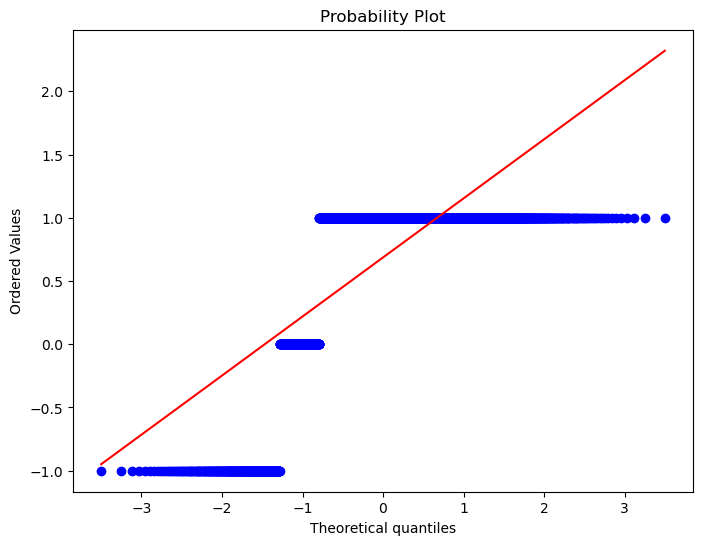

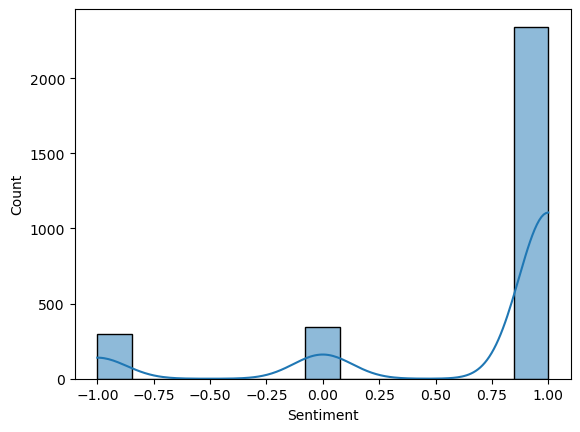

In [3]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Assuming you have your sentiment scores in a Pandas DataFrame
sentiment_scores = df['Sentiment']
# Shapiro-Wilk Test
stat, p_value = shapiro(sentiment_scores)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
 print("Data is normally distributed (Fail to reject H0).")
else:
 print("Data is not normally distributed (Reject H0).")
# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(sentiment_scores, dist="norm", plot=plt)
plt.show()
# Histogram
sns.histplot(sentiment_scores, kde=True)
plt.show()


In [5]:
from scipy.stats import levene
# Assuming you have sentiment scores grouped by database
grouped_sentiments = [group['Sentiment'] for name, group in df.groupby('Website')]
# Levene's Test for equal variances
stat, p_value = levene(*grouped_sentiments)
print(f"Levene's Test Statistic: {stat:.4f}, P-Value: {p_value:.4f}")
# Interpret the p-value
if p_value > 0.05:
 print("Variances are equal (Fail to reject H0).")
else:
 print("Variances are not equal (Reject H0).")


Levene's Test Statistic: 66.5197, P-Value: 0.0000
Variances are not equal (Reject H0).


In [7]:
from scipy.stats import f_oneway, kruskal, shapiro, levene
# If data is not normally distributed or variances are not equal, perform Kruskal-Wallis H Test
h_statistic, kruskal_p_value = kruskal(*grouped_sentiments)
print(f"Kruskal-Wallis H Statistic: {h_statistic:.4f}, P-Value: {kruskal_p_value:.4f}")
if kruskal_p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

Kruskal-Wallis H Statistic: 194.5359, P-Value: 0.0000
Reject the null hypothesis: There is a significant difference between the groups.


In [9]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Create additional variables if needed
# Calculate the comment length
df['comment_length'] = df['Comment'].str.len()

# Checking correlations between sentiment and comment length
pearson_corr, pearson_p_value = pearsonr(df['Sentiment'], df['comment_length'])
spearman_corr, spearman_p_value = spearmanr(df['Sentiment'], df['comment_length'])

print(f"Pearson Correlation between Sentiment and Comment Length: {pearson_corr:.4f}, P-Value: {pearson_p_value:.4f}")
print(f"Spearman Correlation between Sentiment and Comment Length: {spearman_corr:.4f}, P-Value: {spearman_p_value:.4f}")

Pearson Correlation between Sentiment and Comment Length: -0.0405, P-Value: 0.0270
Spearman Correlation between Sentiment and Comment Length: -0.1598, P-Value: 0.0000


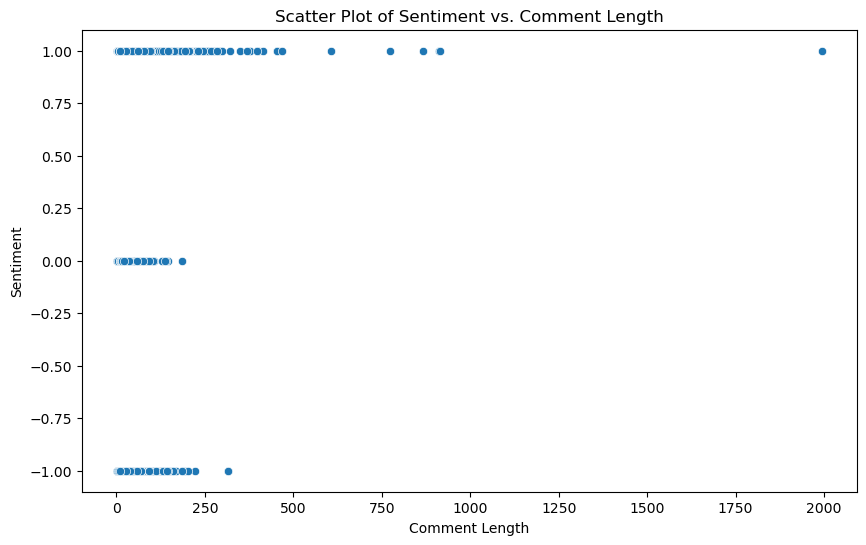

In [11]:
# Visualizing the correlation with a scatter plot for comment length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df)
plt.title('Scatter Plot of Sentiment vs. Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()


<Axes: xlabel='comment_length', ylabel='Sentiment'>

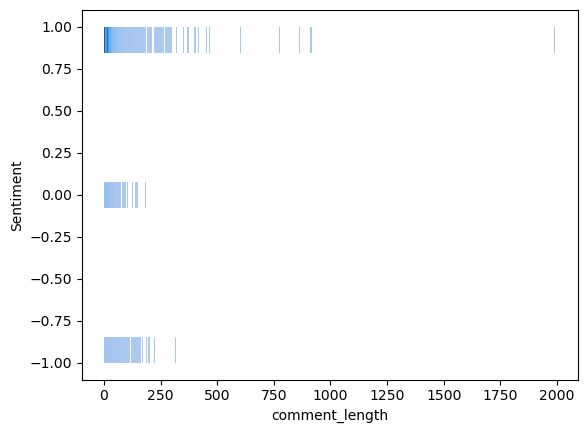

In [13]:
sns.histplot(x="comment_length", y="Sentiment", data=df)

In [15]:

import scipy.stats as stats
# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p = stats.pearsonr(df['comment_length'], df['Sentiment'])
# Calculate Spearman's rank correlation coefficient and p-value
spearman_corr, spearman_p = stats.spearmanr(df['comment_length'], df['Sentiment'])
# Print results
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}')
print(f'Pearson p-value: {pearson_p:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}')
print(f'Spearman p-value: {spearman_p:.4f}')

Pearson Correlation Coefficient: -0.0405
Pearson p-value: 0.0270
Spearman Correlation Coefficient: -0.1598
Spearman p-value: 0.0000


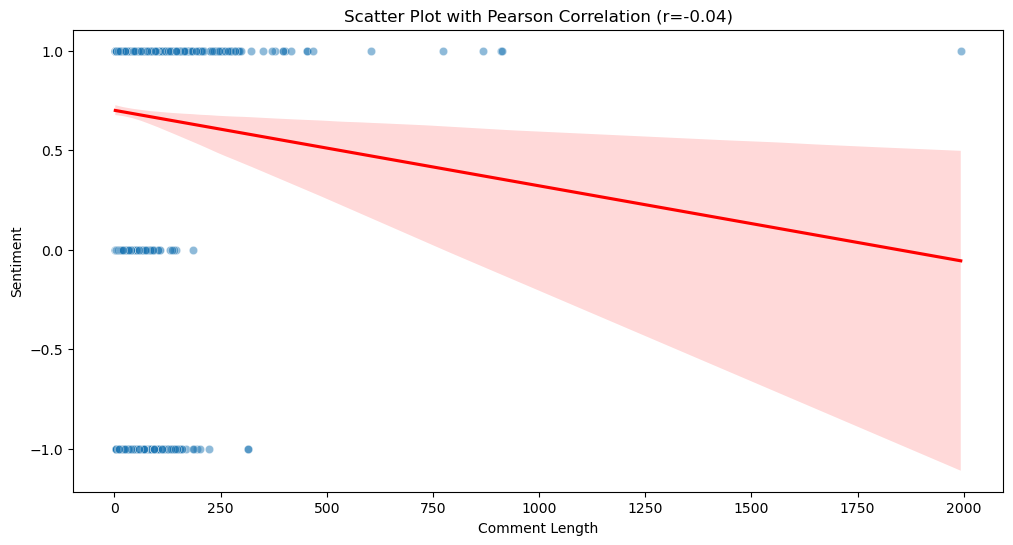

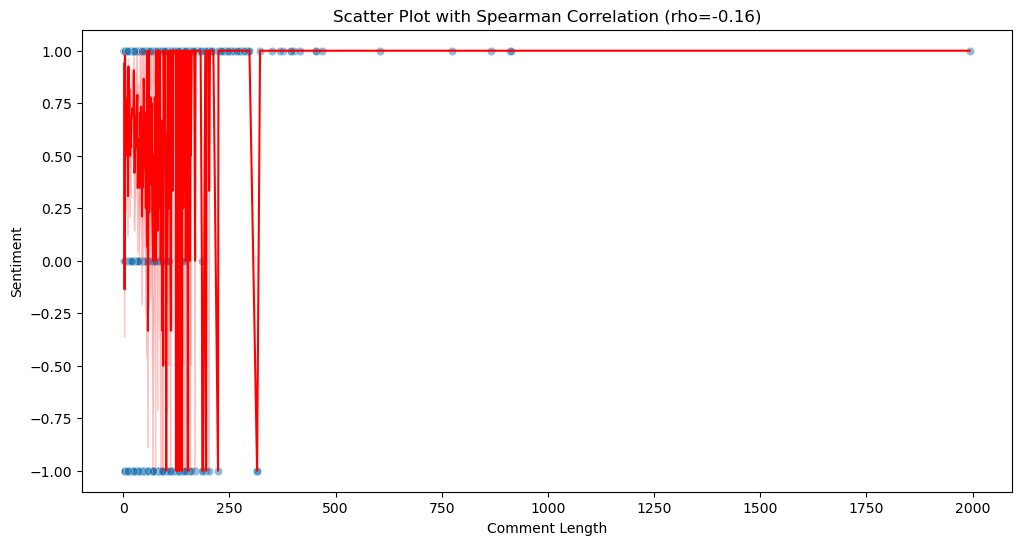

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot with Pearson correlation line
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df, alpha=0.5)
sns.regplot(x='comment_length', y='Sentiment', data=df, scatter=False, color='r')
plt.title(f'Scatter Plot with Pearson Correlation (r={pearson_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()
# Scatter plot with Spearman correlation line (non-parametric)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='comment_length', y='Sentiment', data=df, alpha=0.5)
sns.lineplot(x='comment_length', y='Sentiment', 
data=df.sort_values(by='comment_length'), color='r')
plt.title(f'Scatter Plot with Spearman Correlation (rho={spearman_corr:.2f})')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')
plt.show()